<h1 style="text-align:center;">Laboratorio 02</h1>
<h4 style="text-align:center">Yosef Maldonado - 14003689</h4>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parte #1 - Ejercicios

### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [12]:
bool_array = np.array([True] * 1000, dtype=bool)
bool_size = bool_array.itemsize
bool_array_size = bool_array.nbytes

print(f"Tamaño en bytes de un booleano: {bool_size}")
print(f"Tamaño en bytes de un array de 1000 elementos booleanos: {bool_array_size}")

Tamaño en bytes de un booleano: 1
Tamaño en bytes de un array de 1000 elementos booleanos: 1000


### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [13]:
evens = np.arange(100, 1, -1)[np.arange(100, 1, -1) % 2 == 0]
evens[-10:]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

### 3. Realice lo siguiente con la matriz:

Dado el array: 
```
 2 4 5 6 
 0 3 7 4 
 8 8 5 2 
 1 5 6 1
```
Seleccione con una instrucción el subarray de elementos
```
0 3 7 
```
Después, seleccione el subarray de elemento`

```
2 5 
8 5
```

In [14]:

matrix = np.array([[2, 4, 5, 6],
                       [0, 3, 7, 4],
                       [8, 8, 5, 2],
                       [1, 5, 6, 1]])
sub_matrix_1 = matrix[1, :-1]
sub_matrix_2 = matrix[[0, 2], :][:, [0, 2]]

print(sub_matrix_1)
print(sub_matrix_2)


[0 3 7]
[[2 5]
 [8 5]]


### 4. Realice lo siguiente con los arrays:

Dados los arrays ```a = [1, 4, 2, 7``` y ```b = [1, 3, 2, 9]```, obtenga la media aritmética de la diferencia (a-b).

In [15]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
dif = a - b
mean = np.mean(dif)
mean

-0.25

### 5. Realice lo siguiente con las coordenadas:

Tengo valores de cordenadas (x, y) en las columnas del array
```
   [[1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5]]
```

Agregue a este array las coordenadas ```(37.1, -3.6)```
Muestre en pantalla las dimensiones del nuevo array.

In [16]:
coordinates = np.array([
    [1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5]
])
new_coordinates = np.append(coordinates, [[37.1, -3.6]], axis=0)
new_array_dimensions = new_coordinates.shape
print(new_coordinates)
print("Nueva dimensión:", new_array_dimensions)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
Nueva dimensión: (4, 2)


### 6. Tomando el arreglo resultante anterior, resuelva:

Traspóngalo y agregue ahora dos nuevos pares de coordenadas: ```(10.8, 3.0)``` y ```(35.8, 12.0)```.

In [17]:
new_tanspose_coordinates = new_coordinates.T
new_tanspose_coordinates = np.append(new_tanspose_coordinates, [[10.8],[3.0]], axis=1)
new_tanspose_coordinates = np.append(new_tanspose_coordinates, [[35.8],[12.0]], axis=1)
new_tanspose_coordinates

array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ,  3.  , 12.  ]])

# Parte #2 - Mineria de datos

In [18]:
dataset = pd.read_csv('./data/NucleosPoblacion.csv')
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?

In [19]:
q1_response = dataset[dataset['Poblacion'] > 100000]
q1_response = q1_response['Municipio'].nunique()
print(f'Número de municipios con más de 100,000 habitantes: {q1_response}')

Número de municipios con más de 100,000 habitantes: 62


### 2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

- ¿Cuál es la segunda ciudad más poblada?
- ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

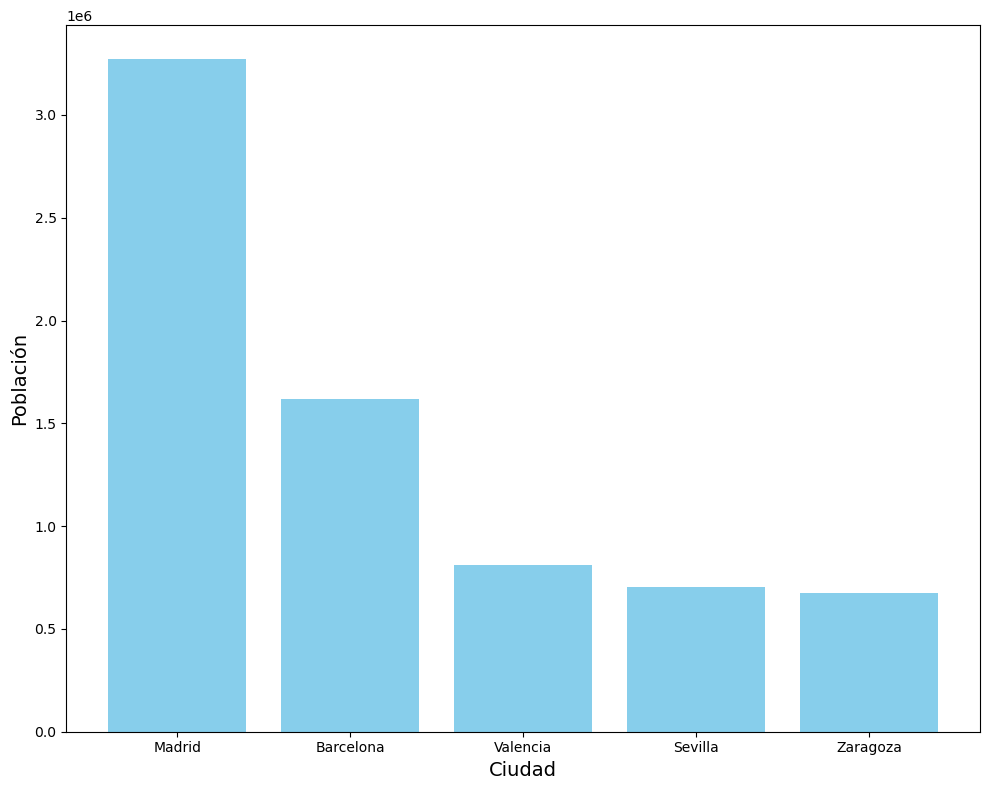

R1:// La segunda ciudad más poblada es: Barcelona
R2:// Granada ocupa la posición: 273 en el ranking de ciudades más pobladas


In [24]:
filtered_and_sorted = dataset.sort_values('Poblacion', ascending=False)
first5_filtered_and_sorted = filtered_and_sorted.head(5)
plt.figure(figsize=(10,8))
plt.bar(first5_filtered_and_sorted['Texto'], first5_filtered_and_sorted['Poblacion'], color='skyblue')
plt.ylabel('Población', fontsize=14)
plt.xlabel('Ciudad', fontsize=14)
plt.tight_layout()
plt.show()


q2_response_1 = filtered_and_sorted.iloc[1]['Texto']
print(f"R1:// La segunda ciudad más poblada es: {q2_response_1}")

indexes = filtered_and_sorted.loc[filtered_and_sorted['Texto'] == 'Granada'].index
q2_response_2 = indexes[0]
print(f"R2:// Granada ocupa la posición: {q2_response_2 + 1} en el ranking de ciudades más pobladas")


### 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [43]:
# Extremadura = municipio que pertenece a la provincia Cáceres o Badajoz

extremadura_municipalities = dataset[(dataset['Provincia'] == 'Cáceres') | (dataset['Provincia'] == 'Badajoz')][['Municipio', 'Poblacion']]

q3_response = extremadura_municipalities[extremadura_municipalities['Poblacion'] > 5000]['Municipio'].nunique()

print(f"R:// La cantidad de municipios de Extremadura que tienen más de 5000 habitantes es: {q3_response}")



R:// La cantidad de municipios de Extremadura que tienen más de 5000 habitantes es: 14


### 4. ¿Cuál es el municipio situado más al Norte? 
```
- Usar el valor de la coordenada "Y" que representa la latitud en grados
- Proporcione también la provincia a la que pertenece y su población.
```

In [47]:
#  Y = latitud norte - sur
q4_response = dataset.loc[dataset['Y'].idxmax()]
print(f"El municipio mas al norte es: {q4_response['Municipio']}, su provincia es: {q4_response['Provincia']} y su población es de {q4_response['Poblacion']}")

El municipio mas al norte es: Viveiro, su provincia es: Lugo y su población es de 16211.0


### 5. Obtenga:

```
media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada

```

In [67]:
municipalities = dataset[dataset['Provincia'] == 'Granada'][['Poblacion']]
q5_response = municipalities.describe()
q5_response = q5_response.loc[['mean', '50%', 'std', 'min', 'max']]
q5_response

,Poblacion
mean,30217.850000
50%,17526.000000
std,50355.491715
min,10386.000000
max,239154.000000


### 6. Realice un histograma:

```
Utilice la población de los Municipios para cada una de las provincias
```

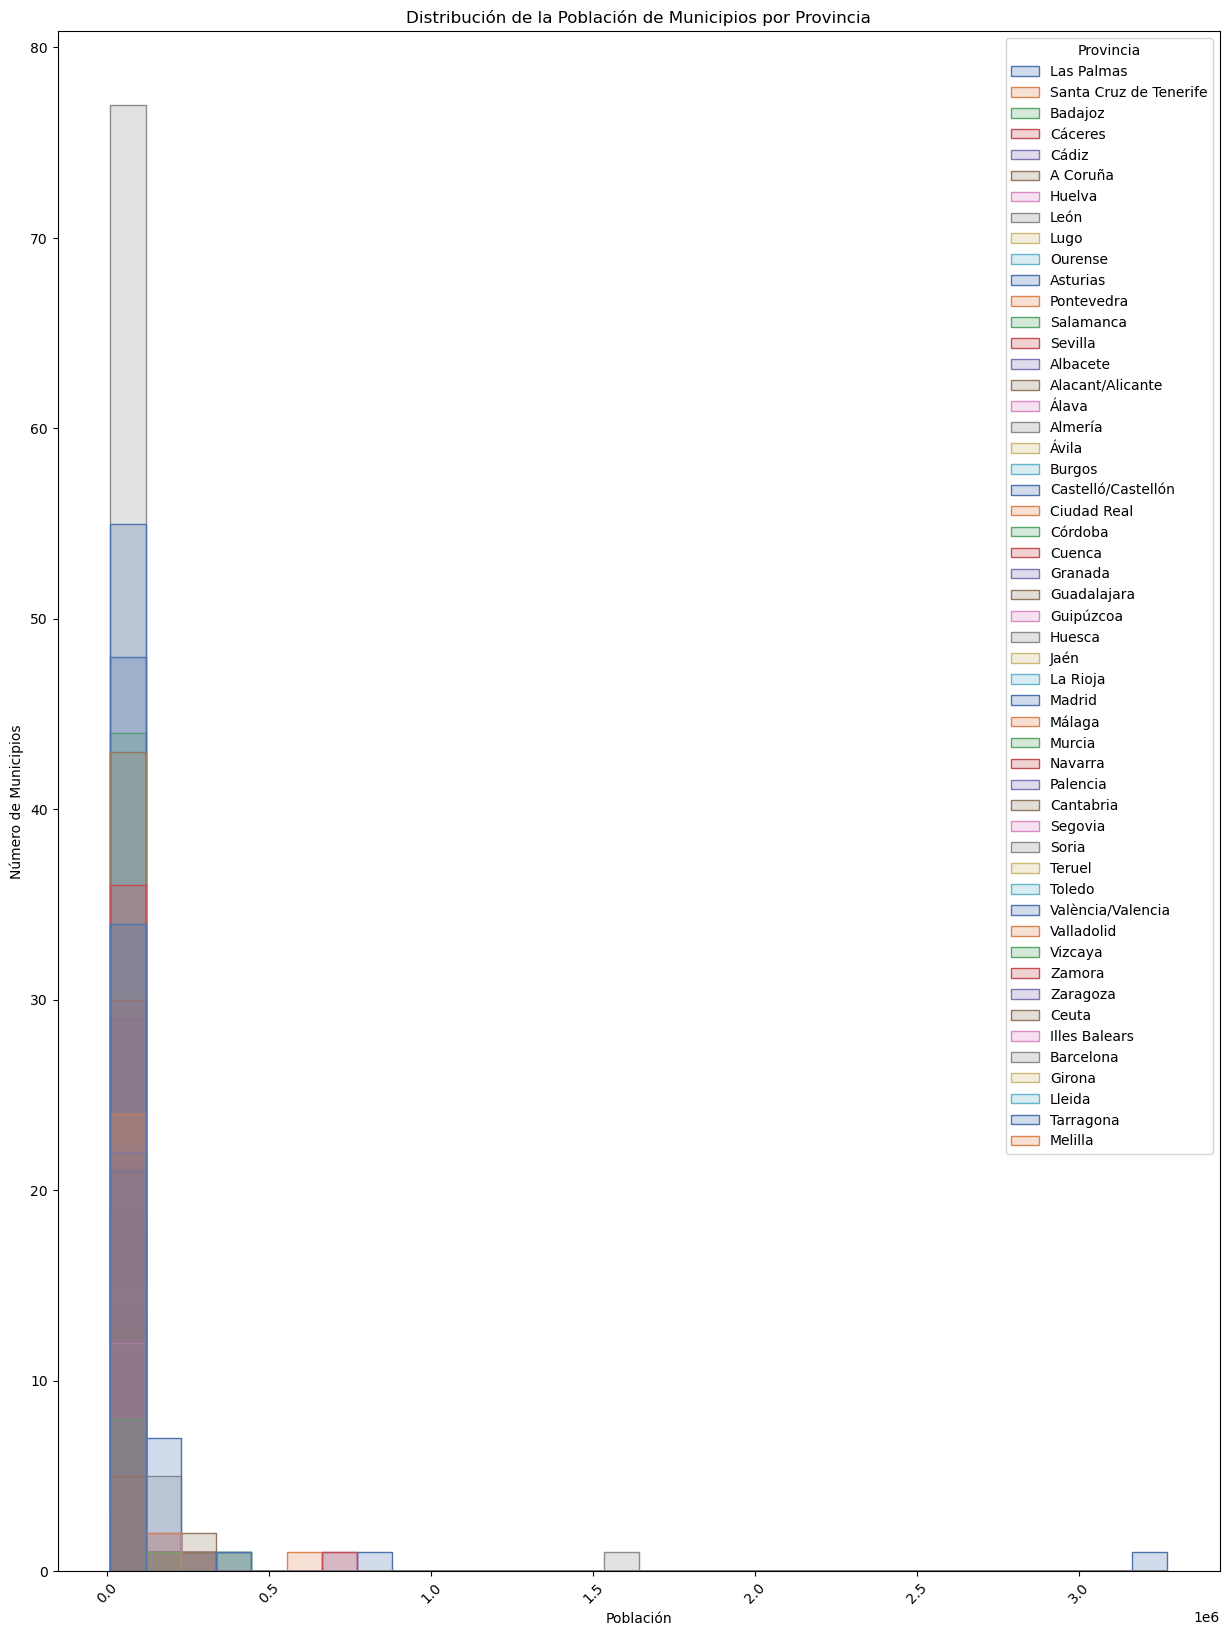

In [83]:
dataset_clean = dataset.dropna(subset=['Poblacion', 'Provincia'])

plt.figure(figsize=(15, 20))
sns.histplot(data=dataset_clean, x="Poblacion", hue="Provincia", element="step", stat="count", common_norm=False, palette="deep", bins=30)
plt.title('Distribución de la Población de Municipios por Provincia')
plt.xlabel('Población')
plt.ylabel('Número de Municipios')
plt.xticks(rotation=45) 
plt.show()

### 7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo
```
Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?`
```

In [99]:
random_municipalities = dataset.sample(n=50, random_state=42)
random_municipalities = random_municipalities[['Poblacion']]
q7_response = random_municipalities.describe()
q7_response = q7_response.loc[['mean', 'std']]
q7_response

,Poblacion
mean,36000.820000
std,44560.106689


### 8. Determine:

```
Determine los nombres de los Municipios más cercano y más lejano a Madrid. 
Para ello debe calcular la distancia en todos ellos y Madrid. 
No considere a Madrid en el análisis ya que la distancia sería cero.
```


In [122]:
# haversine
def haversine(lat1, lon1, lat2, lon2):
    # radio de la Tierra en km
    R = 6371.0
    # convertir coordenadas de grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # diferencia de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # fórmula de Haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    # distancia en kilómetros
    distance = R * c
    return distance

no_madrid_muni = dataset[dataset['Municipio'] != 'Madrid'].copy()
madrid = dataset[dataset['Municipio'] == 'Madrid']
madridx, madridy = madrid['X'].iloc[0], madrid['Y'].iloc[0]
no_madrid_muni['dis_madrid'] = no_madrid_muni.apply(lambda row: haversine(madridy, madridx, row['Y'], row['X']), axis=1)

near_muni = no_madrid_muni.loc[no_madrid_muni['dis_madrid'].idxmin()]
far_muni = no_madrid_muni.loc[no_madrid_muni['dis_madrid'].idxmax()]


print(f"El municipio mas cercano es el de: {near_muni['Municipio']}")
print(f"El municipio mas lejano es el de: {far_muni['Municipio']}")


El municipio mas cercano es el de: Pozuelo de Alarcón
El municipio mas lejano es el de: Los Llanos de Aridane
